In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df_raw = pd.read_csv('../data/CarbonFootprintBreakdown.csv')

In [3]:
df_raw.head()

,FeatureCode,DateCode,Measurement,Units,Value,Breakdown of Scotland's carbon footprint
0,S92000003,2008,Count,Mt Co2Equiv,46.102,Embedded in imported goods and services
1,S92000003,2001,Count,Mt Co2Equiv,34.693,Embedded in imported goods and services
2,S92000003,2007,Count,Mt Co2Equiv,51.135,Embedded in imported goods and services
3,S92000003,2002,Count,Mt Co2Equiv,36.802,Embedded in imported goods and services
4,S92000003,2003,Count,Mt Co2Equiv,37.500,Embedded in imported goods and services


## Having a look

In [4]:
df_raw['FeatureCode'].unique()
# S92000003 is Scotland (see http://statistics.gov.scot/id/statistical-geography/S92000003)

array(['S92000003'], dtype=object)

In [5]:
df_raw['Measurement'].unique()

array(['Count'], dtype=object)

In [6]:
df_raw['Units'].unique()

array(['Mt Co2Equiv'], dtype=object)

In [7]:
df_raw["Breakdown of Scotland's carbon footprint"].unique()

array(['Embedded in imported goods and services',
       'Directly produced by Scottish residents',
       'Total Carbon Footprint',
       'UK produced goods and services consumed by Scottish residents'],
      dtype=object)

In [8]:
mapping = {
    'Embedded in imported goods and services': 'imported_goods',
    'Directly produced by Scottish residents': 'residents',
    'UK produced goods and services consumed by Scottish residents': 'local_goods',
    'Total Carbon Footprint': 'total'
}
df_raw['source'] = df_raw["Breakdown of Scotland's carbon footprint"].apply(mapping.get)
df_raw.head()

,FeatureCode,DateCode,Measurement,Units,Value,Breakdown of Scotland's carbon footprint,source
0,S92000003,2008,Count,Mt Co2Equiv,46.102,Embedded in imported goods and services,imported_goods
1,S92000003,2001,Count,Mt Co2Equiv,34.693,Embedded in imported goods and services,imported_goods
2,S92000003,2007,Count,Mt Co2Equiv,51.135,Embedded in imported goods and services,imported_goods
3,S92000003,2002,Count,Mt Co2Equiv,36.802,Embedded in imported goods and services,imported_goods
4,S92000003,2003,Count,Mt Co2Equiv,37.500,Embedded in imported goods and services,imported_goods


In [9]:
target_cols = ['DateCode', 'Value', 'source']

is_component = df_raw['source'] != 'total'
df = df_raw.loc[is_component, target_cols]

## Clean Subset

In [10]:
df_grouped = df.groupby(['DateCode', 'source'])['Value'].sum()
df_grouped

DateCode  source        
1998      imported_goods    33.334
          local_goods       36.323
          residents         13.421
1999      imported_goods    32.909
          local_goods       33.171
          residents         13.372
2000      imported_goods    34.068
          local_goods       33.548
          residents         13.229
2001      imported_goods    34.693
          local_goods       33.936
          residents         13.868
2002      imported_goods    36.802
          local_goods       32.367
          residents         13.424
2003      imported_goods    37.500
          local_goods       33.181
          residents         13.414
2004      imported_goods    41.918
          local_goods       32.592
          residents         13.715
2005      imported_goods    44.977
          local_goods       31.703
          residents         13.744
2006      imported_goods    48.294
          local_goods       33.511
          residents         13.636
2007      imported_goods    51

In [11]:
df_table = df_grouped.unstack()
df_table

source,imported_goods,local_goods,residents
DateCode,,,
1998,33.334,36.323,13.421
1999,32.909,33.171,13.372
2000,34.068,33.548,13.229
2001,34.693,33.936,13.868
2002,36.802,32.367,13.424
2003,37.500,33.181,13.414
2004,41.918,32.592,13.715
2005,44.977,31.703,13.744
2006,48.294,33.511,13.636


Text(0, 0.5, 'Carbon Footprint (Mt Co2Equiv)')

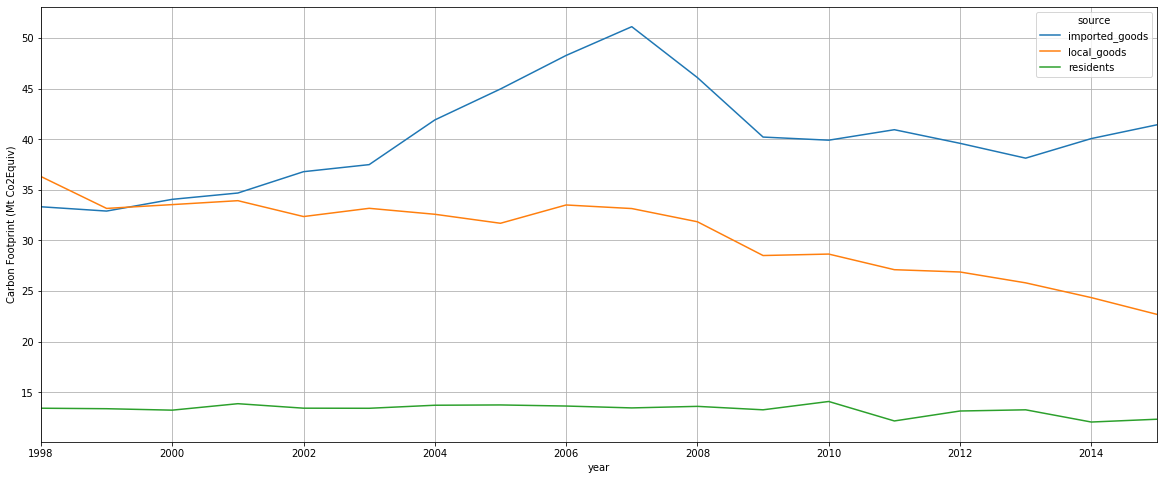

In [12]:
ax = df_table.plot(figsize=(20,8), grid=True)
ax.set_xlabel('year')
ax.set_ylabel('Carbon Footprint (Mt Co2Equiv)')

Text(0, 0.5, 'Carbon Footprint (Mt Co2Equiv)')

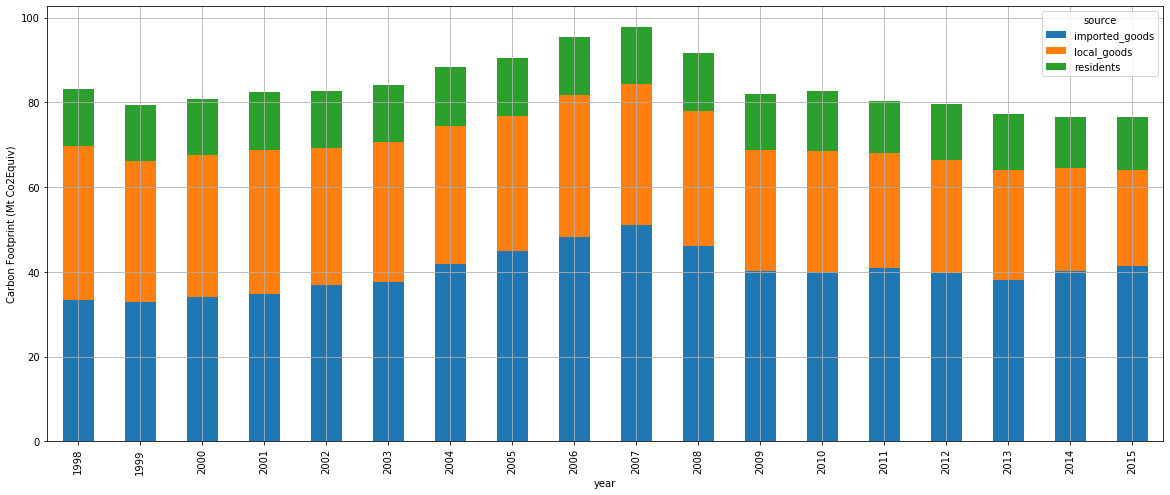

In [13]:
ax = df_table.plot.bar(stacked=True, figsize=(20,8), grid=True)
ax.set_xlabel('year')
ax.set_ylabel('Carbon Footprint (Mt Co2Equiv)')